# Introduction to Forecasting

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('../../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [4]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [6]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [8]:
train = df.iloc[:109]
test = df.iloc[108:]

## Forecasting with the Holt-Winters Method

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [10]:
fitted_model = ExponentialSmoothing(train['Thousands of Passengers']
                                   ,trend='mul'
                                   ,seasonal='mul'
                                   ,seasonal_periods=12).fit()

In [11]:
test_predictions = fitted_model.forecast(36)

In [12]:
test_predictions

1958-02-01    331.652587
1958-03-01    389.005278
1958-04-01    380.145088
1958-05-01    388.293577
1958-06-01    453.352331
1958-07-01    502.203116
1958-08-01    490.954135
1958-09-01    424.047577
1958-10-01    365.405897
1958-11-01    318.408920
1958-12-01    360.331123
1959-01-01    369.903810
1959-02-01    359.907017
1959-03-01    422.145747
1959-04-01    412.530732
1959-05-01    421.373415
1959-06-01    491.974709
1959-07-01    544.987233
1959-08-01    532.779919
1959-09-01    460.173399
1959-10-01    396.535868
1959-11-01    345.535084
1959-12-01    391.028760
1960-01-01    401.416971
1960-02-01    390.568522
1960-03-01    458.109548
1960-04-01    447.675402
1960-05-01    457.271418
1960-06-01    533.887438
1960-07-01    591.416250
1960-08-01    578.168960
1960-09-01    499.376884
1960-10-01    430.317889
1960-11-01    374.972204
1960-12-01    424.341615
1961-01-01    435.614828
Freq: MS, dtype: float64

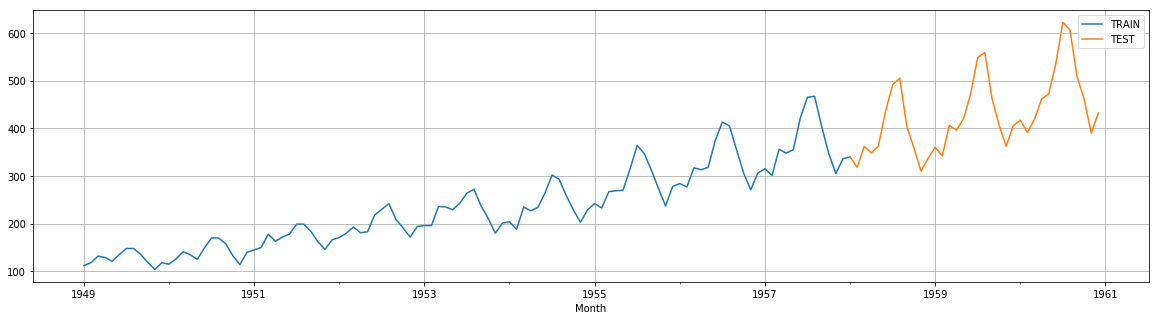

In [13]:
train['Thousands of Passengers'].plot(figsize=(20,5),legend=True,label='TRAIN');
test['Thousands of Passengers'].plot(legend=True,label='TEST',grid=True);

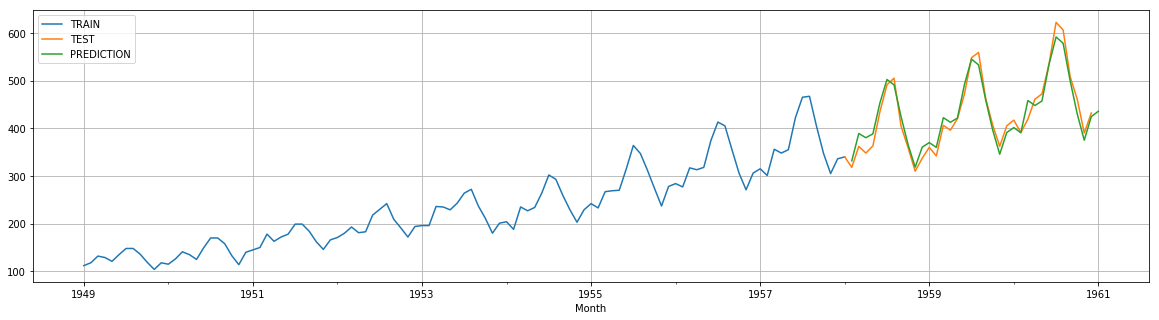

In [14]:
train['Thousands of Passengers'].plot(figsize=(20,5),legend=True,label='TRAIN');
test['Thousands of Passengers'].plot(legend=True,label='TEST');
test_predictions.plot(legend=True,label='PREDICTION',grid=True)#xlim=['1958-01-01','1960-12-01'])

## Model Evaluation

In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [17]:
test.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [19]:
mean_absolute_error(test,test_predictions)

46.300742992799506

In [20]:
mean_squared_error(test,test_predictions)

3074.601184973338

In [22]:
np.sqrt(mean_squared_error(test,test_predictions))

55.44908642144917

## Train Final Model

In [23]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [24]:
forecast_predictions = final_model.forecast(36)

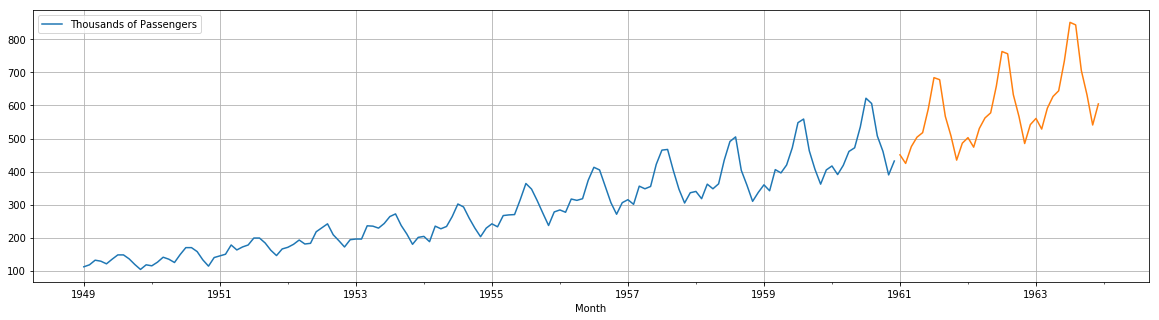

In [26]:
df.plot(figsize=(20,5))
forecast_predictions.plot(grid=True);